# AIPI 590 - XAI | Assignment #4
### Explainable Deep Learning
### Kayla Haeussler

The data set I have selected is titled 'Road Vehicle Images Dataset' which comes from [Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/road-vehicle-images-dataset)

In [86]:
from pytorch_grad_cam import GradCAM
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
import numpy as np
from pytorch_grad_cam import (
    GradCAM,
    HiResCAM,
    ScoreCAM,
    GradCAMPlusPlus,
    AblationCAM,
    XGradCAM,
    EigenCAM,
    FullGrad,
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
import torch

In [87]:
# was using pretrained=True but was getting an output error that that method is deprecated
# # so setting a weights variable instead
weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=weights)
model.eval()
target_layers = [model.layer4[-1]]  # doc says choose this for resnet50

In [88]:
# chat at 10:59 am on friday
# input!
img_path = "imagedata/peoplewalking.jpg"

preprocess = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),  # [0,1]
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]  # ImageNet
        ),
    ]
)

In [89]:
# Keep a non-normalized RGB copy for visualization overlay
rgb_img_pil = Image.open(img_path).convert("RGB")
rgb_img_224 = rgb_img_pil.resize((224, 224))
rgb_img = np.array(rgb_img_224).astype(np.float32) / 255.0  # for show_cam_on_image

input_tensor = preprocess(rgb_img_pil).unsqueeze(0)  # (1,3,224,224)

In [90]:
# input_tensor = #create this i guess

In [91]:
grad_cam = GradCAM(model=model, target_layers=target_layers)

In [92]:
with torch.no_grad():
    outputs = model(input_tensor)
    pred_id = outputs.argmax(1).item()

targets = [ClassifierOutputTarget(859)]

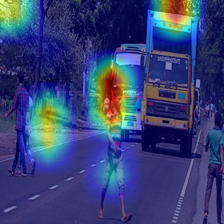

In [93]:
grayscale_cam = grad_cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)

Top-5 predictions:
1. garbage truck — 0.479
2. trailer truck — 0.034
3. ambulance — 0.029
4. tow truck — 0.013
5. moving van — 0.012


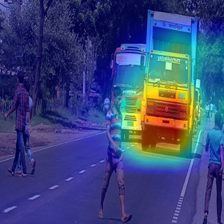

In [94]:
# --------- A) Prediction (top-5) ----------
with torch.no_grad():
    logits = model(input_tensor)  # (1, 1000)
    probs = torch.softmax(logits, dim=1)  # turn logits into probabilities
    topk = torch.topk(probs, k=5, dim=1)

# Map indices to human-readable labels
categories = weights.meta["categories"]  # ImageNet class names
top5_ids = topk.indices[0].tolist()
top5_probs = topk.values[0].tolist()

print("Top-5 predictions:")
for rank, (cls_id, p) in enumerate(zip(top5_ids, top5_probs), 1):
    print(f"{rank}. {categories[cls_id]} — {p:.3f}")

# Use the top-1 prediction as the CAM target (optional)
pred_id = top5_ids[0]
targets = [ClassifierOutputTarget(pred_id)]

grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]
vis = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
Image.fromarray(vis)